In [134]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from dawis.inpainting import sample_noise
import cmasher

In [138]:
hdu = fits.open('/home/aellien/Euclid_LSB_DR1/wavelets/out3/mosaic_dawis_residuals_bin40.fits')
mosaic = hdu[1].data

hdu2 = fits.open('/home/aellien/Euclid_LSB_DR1/data/original_mosaic_bin40.fits')
omosaic = hdu2[1].data

mosaic[mosaic==0.]=np.nan
omosaic[omosaic==0.]=np.nan

0.08741562


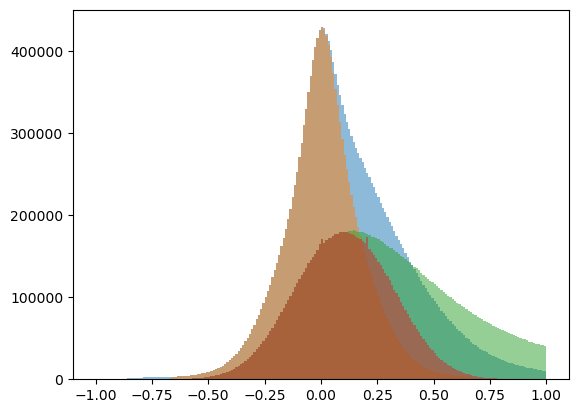

0.0060012043 0.17589013
0.10288581 0.21487729


In [139]:
plt.figure()
plt.hist(mosaic.flatten(), bins = 200, range = (-1.0, 1.0), label = 'whole mosaic', alpha = 0.5)
print(np.nanmedian(mosaic))
noise_pixels, valmax = sample_noise(mosaic)
onoise_pixels, valmax = sample_noise(omosaic)
plt.hist(noise_pixels, bins = 200, range = (-1.0, 1.0), label = 'sample_noise', alpha = 0.5)
plt.hist(omosaic.flatten(), bins = 200, range = (-1.0, 1.0), label = 'whole original mosaic', alpha = 0.5)
plt.hist(onoise_pixels,bins = 200, range = (-1.0, 1.0), label = 'sample_noise', alpha = 0.5)
plt.show()
print(np.median(noise_pixels), np.std(noise_pixels))
print(np.median(onoise_pixels), np.std(onoise_pixels))



mu = 30 mag/arcsec2 -> 0.058657 ADU
mu = 31 mag/arcsec2 -> 0.023352 ADU
mu = 33 mag/arcsec2 -> 0.003701 ADU
mu = 35 mag/arcsec2 -> 0.000587 ADU
16.866142


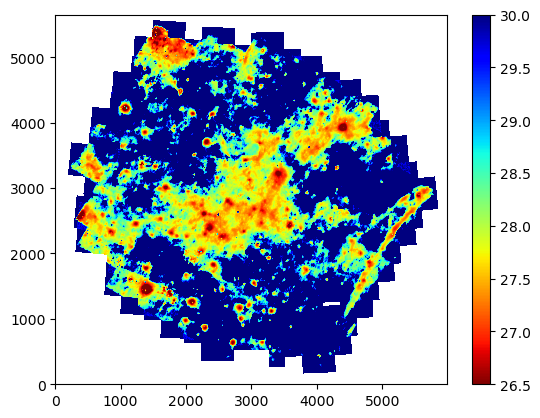

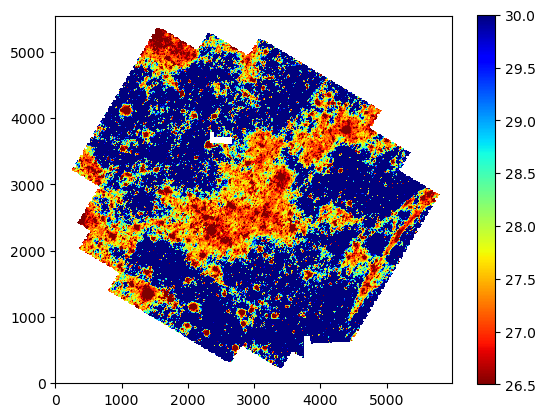

In [140]:
ZP = 23.9105
pix_scale = 4 # arcsec/pix

print('mu = 30 mag/arcsec2 -> %f ADU'%(pix_scale**2 * 10**(-0.4 * (30 - ZP)) ))
print('mu = 31 mag/arcsec2 -> %f ADU'%(pix_scale**2 * 10**(-0.4 * (31 - ZP)) ))
print('mu = 33 mag/arcsec2 -> %f ADU'%(pix_scale**2 * 10**(-0.4 * (33 - ZP)) ))
print('mu = 35 mag/arcsec2 -> %f ADU'%(pix_scale**2 * 10**(-0.4 * (35 - ZP)) ))

#sky = -3.057 # à l'arrache ds9 region sombre
#mosaic -= sky
mosaic += np.median(onoise_pixels)
mosaic -= np.median(noise_pixels)

mosaic[mosaic < 0.] = 1e-10
omosaic[omosaic < 0.] = 1e-10

mag_mosaic = - 2.5 * np.log10(mosaic / pix_scale**2) + ZP
mag_omosaic = - 2.5 * np.log10(omosaic / pix_scale**2) + ZP
print(np.nanmin(mag_mosaic))

plt.figure()
plt.imshow(mag_mosaic, origin = 'lower', vmin = 26.5, vmax = 30, cmap = plt.cm.jet_r)
plt.colorbar()

plt.figure()
plt.imshow(mag_omosaic, origin = 'lower', vmin = 26.5, vmax = 30, cmap = plt.cm.jet_r)
plt.colorbar()
plt.show()
